<a href="https://colab.research.google.com/github/Sakib3602/Stat-Scalling-encoding-etc-ML/blob/main/Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame({
    "h" : [150,160,170,180,190],
    'w' : [50,60,70,80,90]
})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [ ]:
df["z-H"]= (df["h"] - df["h"].mean()) / df["h"].std()

df["z-W"] = (df["w"] - df["w"].mean()) / df["w"].std()

df

,h,w,z-H,z-W
0,150,50,-1.264911,-1.264911
1,160,60,-0.632456,-0.632456
2,170,70,0.000000,0.000000
3,180,80,0.632456,0.632456
4,190,90,1.264911,1.264911


(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([-1.26491106e+00, -1.01192885e+00, -7.58946638e-01, -5.05964426e-01,
        -2.52982213e-01, -2.22044605e-16,  2.52982213e-01,  5.05964426e-01,
         7.58946638e-01,  1.01192885e+00,  1.26491106e+00]),
 <BarContainer object of 10 artists>)

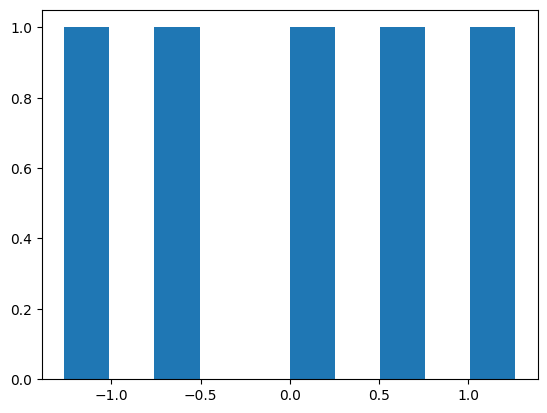

In [ ]:
plt.hist(df["z-H"])

# ***Min Max scalling***

In [ ]:
df.drop(["z-H" , "z-W"] , axis=1 , inplace=True)

In [ ]:
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [ ]:
mm = df.min()
mx = df.max()
rang = mx - mm

mm , mx , rang

(h    150
 w     50
 dtype: int64,
 h    190
 w     90
 dtype: int64,
 h    40
 w    40
 dtype: int64)

In [ ]:
#  for single colum work
# ss = df['h'] - mm["h"]
# ss


# Multiple colum work
ss = (df - mm) / rang
df["MH"] = ss['h']
df["MW"] = ss['w']
df

,h,w,MH,MW
0,150,50,0.00,0.00
1,160,60,0.25,0.25
2,170,70,0.50,0.50
3,180,80,0.75,0.75
4,190,90,1.00,1.00


Text(0.5, 1.0, 'Min Max Scalling')

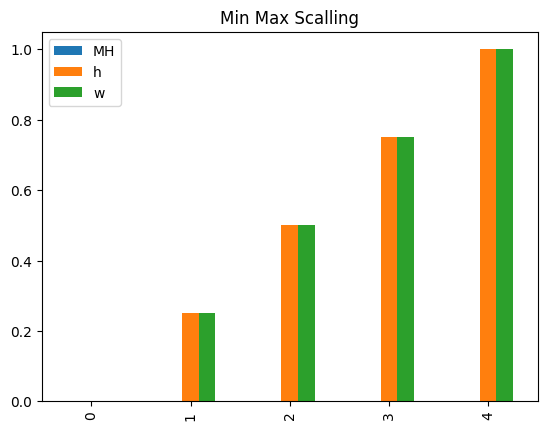

In [ ]:
ss.plot(kind="bar")
plt.title("Min Max Scalling")

# ***Robust Scalling***

In [ ]:
df = pd.DataFrame({
    "h" : [150,160,170,180,300],
    'w' : [50,60,70,80,200]
})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [ ]:
df.drop("R-H" , axis=1, inplace=True)

In [ ]:
par = np.percentile(df["h"] , 75) # percentile using numpy
q1 = df.quantile(0.25)  # padas have builtin quantile
q3 = df.quantile(0.75)
q1,q3 , par

(h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 np.float64(180.0))

In [ ]:
iqr = q3 - q1
iqr

,0
h,20.0
w,20.0


In [ ]:
rb = (df - df.median()) / iqr
rb

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


<Axes: >

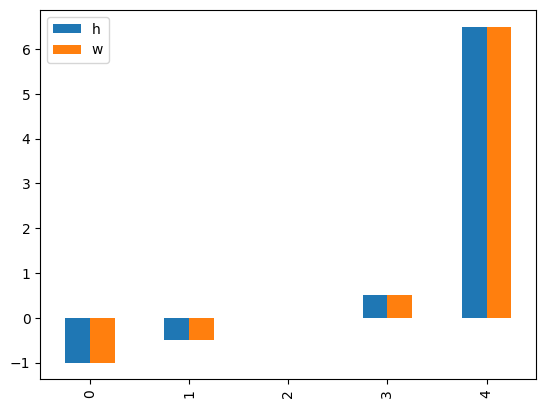

In [ ]:
rb.plot(kind="bar")